<a href="https://colab.research.google.com/github/Zaxis018/Data-Mining/blob/main/Image_segmentation_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('Lake.png',cv2.IMREAD_COLOR)

In [ ]:
img.shape

(494, 480, 3)

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
cv2.imshow("image",RGB_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image_2d = RGB_img.reshape(-1, 3)

In [ ]:
image_2d.shape

(237120, 3)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [ ]:
kmeans.fit(image_2d)

c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
centriod = kmeans.cluster_centers_

In [ ]:
uint8_array = np.clip(centriod, 0, 255).astype(np.uint8)

In [ ]:
uint8_array

array([[ 64,  79,  22],
       [ 11,  12,  45],
       [107, 103,  56]], dtype=uint8)

In [ ]:
labels = kmeans.labels_

In [ ]:
segmented_image = centriod[labels]
segmented_image = segmented_image.reshape(RGB_img.shape)

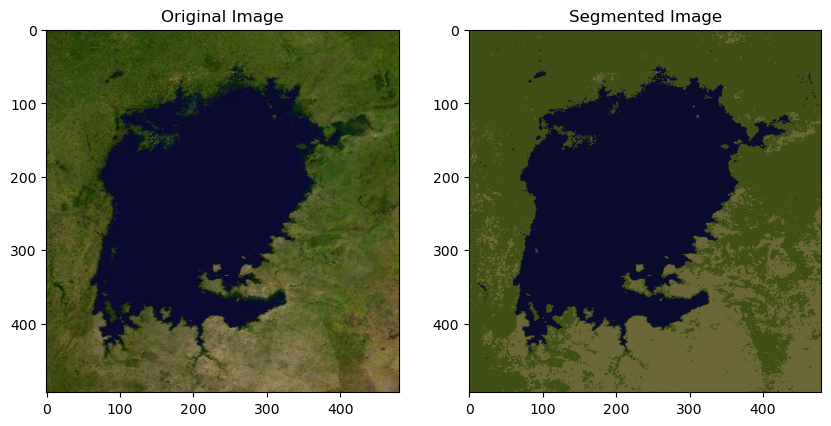

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')

plt.show()

In [ ]:
cluster_counts = np.bincount(labels, minlength=kmeans.n_clusters)

In [ ]:
pixels_no = []
for cluster_idx, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_idx}: {count} pixels")
    pixels_no.append(cluster_counts)

Cluster 0: 110905 pixels
Cluster 1: 77278 pixels
Cluster 2: 48937 pixels


In [ ]:
pixels_no = pixels_no[0]

In [ ]:
pixels_no

array([110905,  77278,  48937], dtype=int64)

In [ ]:
from matplotlib.colors import rgb_to_hsv, to_hex

In [ ]:
# Convert RGB to normalized values in the range [0, 1]
normalized_rgb = uint8_array / 255.0


Text(0.5, 1.0, 'Pie Chart')

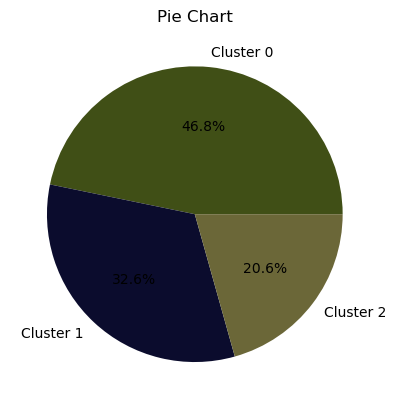

In [ ]:
plt.pie(pixels_no, labels = [f"Cluster {i}" for i in range(len(pixels_no))],colors = normalized_rgb,autopct='%1.1f%%')
plt.title("Pie Chart")

In [ ]:
data={"R": uint8_array[0], "G": uint8_array[1],"B": uint8_array[2], "Count":pixels_no}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,R,G,B,Count
0,64,11,107,110905
1,79,12,103,77278
2,22,45,56,48937


In [ ]:
lake_pixel = df.iloc[1,3]

In [ ]:
area_of_pixel = 200000/pixels_no.sum()

In [ ]:
lake_area = area_of_pixel*lake_pixel

In [ ]:
lake_area

65180.49932523617

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
wcss = []

# distortions = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, max_iter=20, n_init=10, random_state=42)
    kmeans.fit(image_2d)
    wcss.append(kmeans.inertia_)
    # distortions.append(sum(np.min(cdist(image_2d, kmeans.cluster_centers_,
    #                                     'euclidean'), axis=1)) /  image_2d.shape[0])

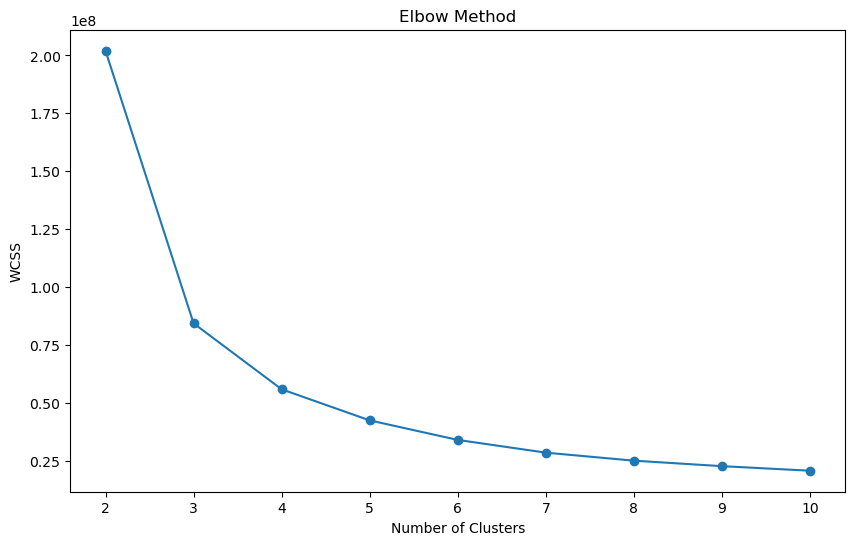

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters=6,random_state=42)

In [ ]:
kmeans1.fit(image_2d)

c:\Users\nikhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [ ]:
centroid2 = kmeans1.cluster_centers_

In [ ]:
norm_centroid = np.clip(centroid2, 0, 255).astype(np.uint8)

In [ ]:
norm_centroid

array([[124, 114,  71],
       [ 10,  10,  48],
       [ 55,  73,  15],
       [ 96,  96,  47],
       [ 23,  39,  17],
       [ 73,  85,  28]], dtype=uint8)

In [ ]:
labels1 = kmeans1.labels_

In [ ]:
segmented_image = norm_centroid[labels1]
segmented_image = segmented_image.reshape(RGB_img.shape)

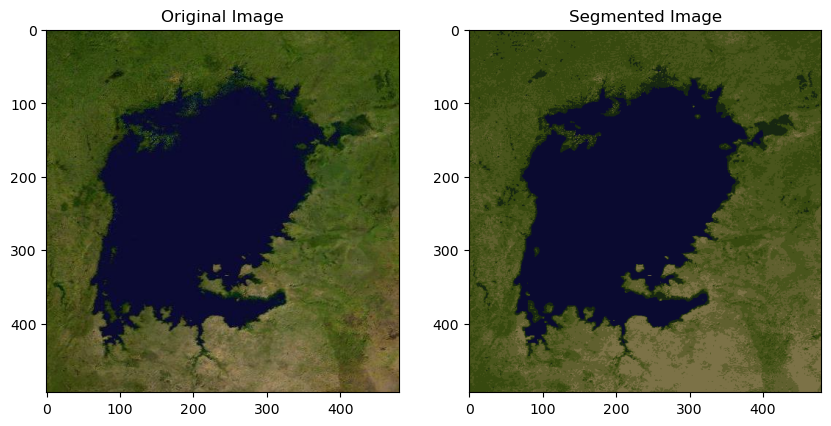

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')

plt.show()

In [ ]:
cluster_counts2 = np.bincount(labels1, minlength=kmeans1.n_clusters)

In [ ]:
pixels_no_2 = []
for cluster_idx, count in enumerate(cluster_counts2):
    print(f"Cluster {cluster_idx}: {count} pixels")
    pixels_no_2.append(cluster_counts2)

Cluster 0: 18043 pixels
Cluster 1: 69996 pixels
Cluster 2: 47657 pixels
Cluster 3: 33596 pixels
Cluster 4: 10966 pixels
Cluster 5: 56862 pixels


In [ ]:
pixels_no_2 = pixels_no_2[0]

In [ ]:
pixels_no_2

array([18043, 69996, 47657, 33596, 10966, 56862], dtype=int64)

In [ ]:
normalized_rgb2 = norm_centroid / 255.0

Text(0.5, 1.0, 'Pie Chart')

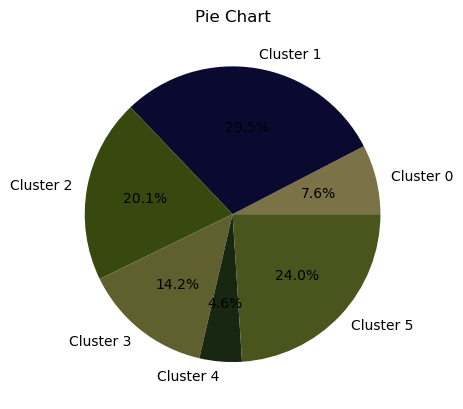

In [ ]:
plt.pie(pixels_no_2, labels = [f"Cluster {i}" for i in range(len(pixels_no_2))],colors = normalized_rgb2,autopct='%1.1f%%')
plt.title("Pie Chart")

In [ ]:
data={"R": norm_centroid[:,0], "G": norm_centroid[:,1],"B": norm_centroid[:,2], "Count":pixels_no_2}

In [ ]:
data

{'R': array([124,  10,  55,  96,  23,  73], dtype=uint8),
 'G': array([114,  10,  73,  96,  39,  85], dtype=uint8),
 'B': array([71, 48, 15, 47, 17, 28], dtype=uint8),
 'Count': array([18043, 69996, 47657, 33596, 10966, 56862], dtype=int64)}

In [ ]:
df2 = pd.DataFrame(data)

In [ ]:
df2

,R,G,B,Count
0,124,114,71,18043
1,10,10,48,69996
2,55,73,15,47657
3,96,96,47,33596
4,23,39,17,10966
5,73,85,28,56862


In [ ]:
lake_pixel2 = df2.iloc[1,3]

In [ ]:
lake_pixel2

69996

In [ ]:
new_area = area_of_pixel*lake_pixel2

In [ ]:
new_area

59038.46153846154